## Importing Python Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Importing Dataset

In [6]:
df = pd.read_csv("Customer Churn.csv")
df.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing Null values with 0 as tenure value is 0 so no total charges is recorded

In [11]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

### Checking the null values

In [17]:
df.isnull().sum().sum()

0

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Checking duplicate values

In [21]:
df.duplicated().sum()

0

In [22]:
df["customerID"].duplicated().sum()

0

### Replacing values of senior citizen from (0, 1) to (yes, no)

In [24]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [28]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


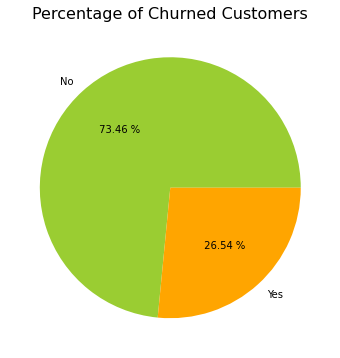

       Churn
Churn       
No      5174
Yes     1869


In [59]:
ch = df.groupby("Churn").agg({"Churn" : "count"})
plt.figure(figsize = (6, 6))
plt.pie(ch['Churn'], labels = ch.index, autopct = "% 1.2f %%", colors = ["yellowgreen", "orange"], )
plt.title("Percentage of Churned Customers", fontsize = 16)
plt.show()
print(ch)

### So we conclude that 26.54% of customers have churned out. 
### Now we conclude the reason behind it

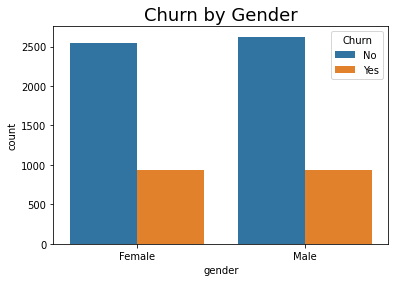

In [75]:
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender", fontsize = 18)
plt.show()

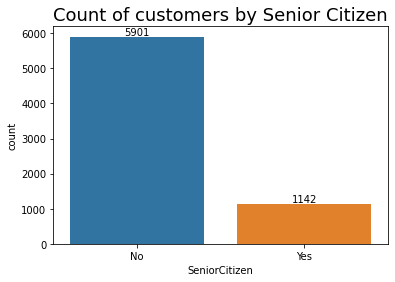

In [80]:
ax = sns.countplot(x = "SeniorCitizen", data = df)
plt.title("Count of customers by Senior Citizen", fontsize = 18)
ax.bar_label(ax.containers[0])
plt.show()

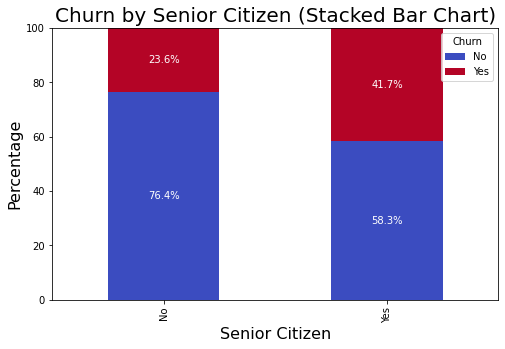

In [81]:
churn_counts = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100

# Plot stacked bar chart
churn_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(8,5))

# Formatting the plot
plt.title("Churn by Senior Citizen (Stacked Bar Chart)", fontsize=20)
plt.ylabel("Percentage", fontsize=16)
plt.xlabel("Senior Citizen", fontsize=16)
plt.legend(title="Churn", loc="upper right")
plt.ylim(0, 100)

# Show percentage labels
for i, bar in enumerate(plt.gca().containers):
    plt.gca().bar_label(bar, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

plt.show()

### Comparitively a greater percentage of senior citizen category have churned out

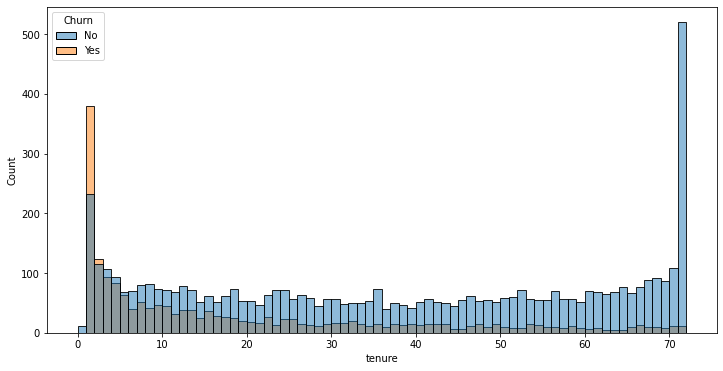

In [12]:
plt.figure(figsize = (12, 6))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

### From this we conclude that people who have used our services for one month have churned out

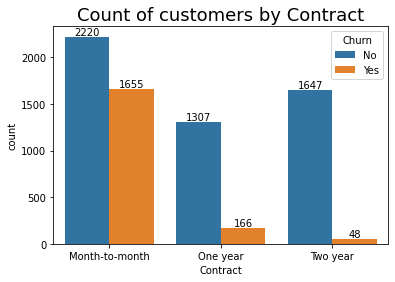

In [43]:
ax = sns.countplot(x = "Contract", data = df, hue = 'Churn')
plt.title("Count of customers by Contract", fontsize = 18)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### People who mostly have month to month subscription have churned

In [27]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

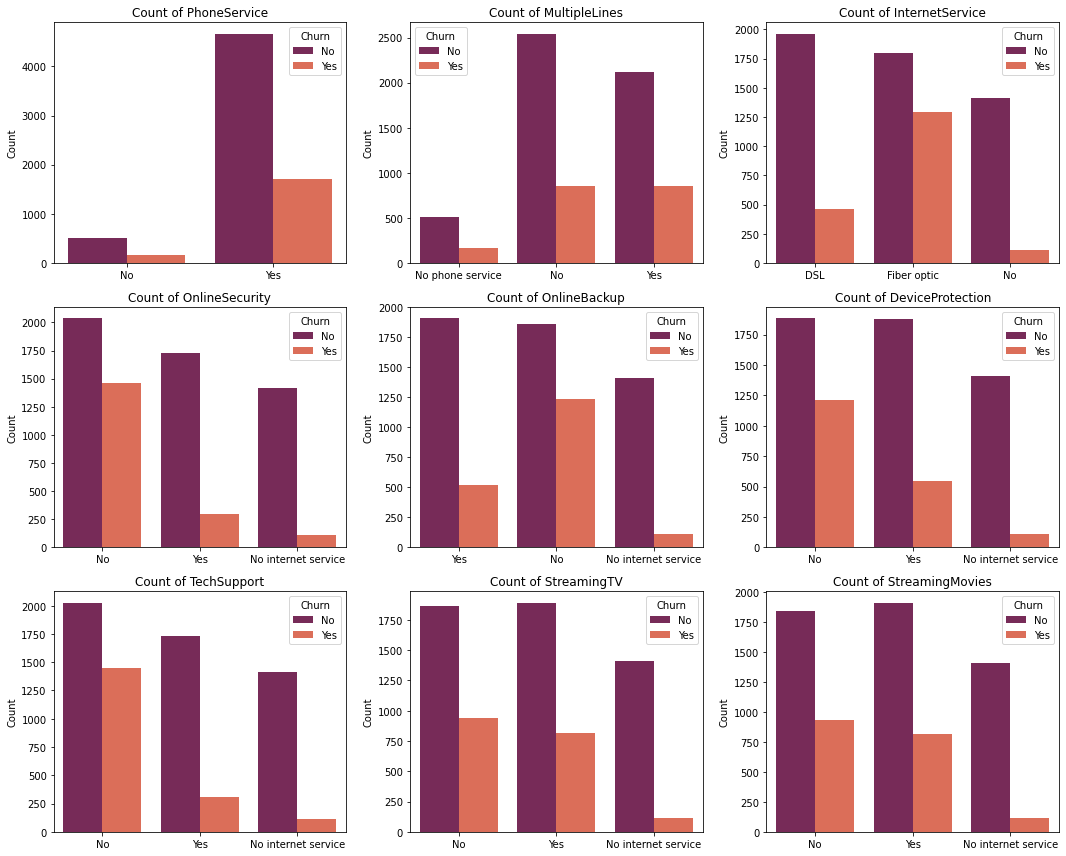

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns
cols = [
    "PhoneService", "MultipleLines", "InternetService",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies"
]

# Define subplot grid dimensions (3 rows, 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# Loop through columns and create a countplot in each subplot
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="rocket", hue = "Churn")
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 1. Customers without Online Security, Tech Support, or Device Protection tend to churn more often compared to those who use these services.
### 2. Fiber-optic Internet Service customers show higher churn rates than DSL users.
### 3. Features like Online Backup, Streaming TV, and Streaming Movies reveal similar churn trends, with customers not using these services being less likely to churn.

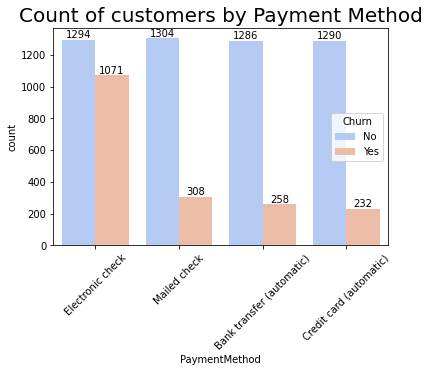

In [51]:
ax = sns.countplot(x = "PaymentMethod", data = df, hue = 'Churn', palette = 'coolwarm')
plt.title("Count of customers by Payment Method", fontsize = 20)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.show()

### Customer is likely churning when they are using electronic check as Payment Method.